# Analysis of custom filters

## Aim of this notebook

Analyzing the pre-filtered fragment library, the reduced fragment library and the custom filtered fragment library.


## Table of contents
1. Load the fragment libraries

    1.1. Load fragment library pre-filtered
    
    1.2. Load fragment library reduced
    
    1.3. Load fragment library custom filtered
    
    1.4. Check which fragments from are contained in the subsets
    

2. t-SNE plots
    
    2.1. Comparing fragment library sets
    * Fragment library pre-filtered vs. fragment library reduced
    * Fragment library pre-filtered vs. fragment library custom filtered
    * Fragment library pre-filtered vs. fragment library reduced vs. custom filtered
    
    
    2.2. Comparing single custom filtering steps



[3. Most common fragments]
 
4. Connection frequecy between subpockets

    4.1. Fragment library pre-filtered
    
    4.2. Fragment library reduced
    
    4.3. Fragment library custom filtered
    

5. Fragment similarity per subpocket


6. Fragment properties
    
    6.1. per subpocket for each set
    
    6.2. per custom filter

7. Development of number of fragments per subpocket during custom filtering

## Imports and preprocessing

In [3]:
from collections import Counter
from pathlib import Path

import pandas as pd
from rdkit.Chem import PandasTools

from kinfraglib import filters, utils

<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for boost::shared_ptr<RDKit::FilterCatalogEntry const> already registered; second conversion method ignored.


In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
# Needed to display ROMol images in DataFrames
PandasTools.RenderImagesInAllDataFrames(images=True)

### Define global paths

In [6]:
# Path to data
HERE = Path().resolve()
PATH_DATA = HERE / "../../data"
PATH_DATA_CUSTOM = PATH_DATA / "fragment_library_custom_filtered"

## 1. Load the fragment libraries
*  1.1. Load fragment library pre-filtered
*  1.2. Load fragment library reduced
*  1.3. Load fragment library custom filtered
*  1.4. Check which fragments from are contained in the subsets

- **Pre-filtered fragment library:** Fragment library without duplicates, unfragmented ligands, fragments only connecting to pool X and fragments in pool X. `fragment_library`
- **Reduced fragment library:** Pre-filtered fragment library, without AP fragments which are not hinge like and chose a diverse subset using Butina Clustering. `fragment_library_reduced`
- **Custom fragment library:** Re-filtered fragment library excluding fragments filtered out by unwanted substructures, drug likeness, synthesizability and pairwise retrosynthesizability. `fragment_library_custom_filtered`

### 1.1. Load fragment library pre-filtered

In [7]:
fragment_library_orig = utils.read_fragment_library(PATH_DATA / "fragment_library")
fragment_library = filters.prefilters.pre_filters(fragment_library_orig)
pd.concat(fragment_library).shape

(2862, 18)

,subpocket,smiles,ROMol,ROMol_dummy,ROMol_original,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,atom_subpockets,atom_environments,smiles_dummy,fragment_count,connections,connections_name
0,AP,Nc1c[nH]c2ncccc12,,,,AAK1,NAK,Other,5l4q,LKB,B,A,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP F...,16 16 16 16 16 16 16 16 16 16 16 16 16 5 5 na na,[11*]c1cnc2[nH]cc(N[27*])c2c1,3,"[FP, SE]","[AP=FP, AP=SE]"
1,AP,N/C(=C1\C(=O)Nc2ccccc21)c1ccccc1,,,,AAK1,NAK,Other,5te0,XIN,,A,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP A...,7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 ...,[12*]N/C(=C1\C(=O)Nc2cc([20*])ccc21)c1ccccc1,3,"[SE, GA]","[AP=SE, AP=GA]"
2,AP,Cc1cc(N)[nH]n1,,,,ABL1,Abl,TK,2f4j,VX6,,A,AP AP AP AP AP AP AP AP AP AP AP AP AP SE,5 5 14 14 14 14 14 14 14 8 8 8 8 na,[22*]Nc1cc(C)n[nH]1,9,[SE],[AP=SE]

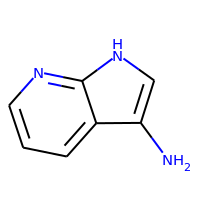
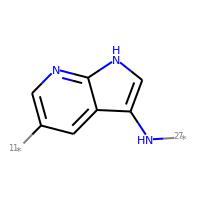
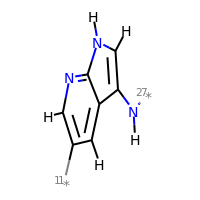
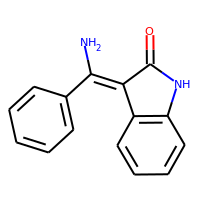
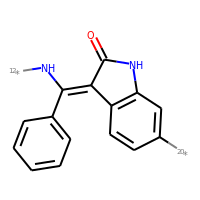
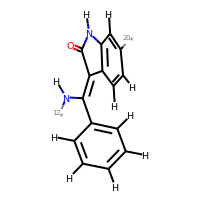
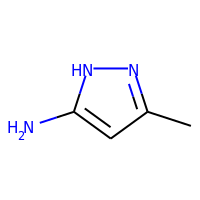
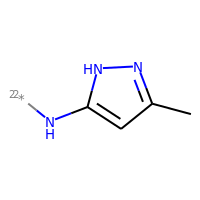
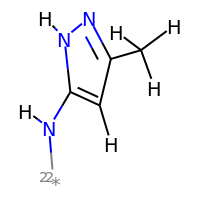

In [8]:
fragment_library['AP'].head(3)

### 1.2. Load fragment library reduced

ToDo: Explain how it was reduced

In [9]:
fragment_library_reduced = utils.read_fragment_library(PATH_DATA / "fragment_library_reduced")
pd.concat(fragment_library_reduced).shape

(624, 15)

,ROMol,ROMol_dummy,ROMol_original,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,atom_subpockets,atom_environments,smiles,smiles_dummy,subpocket
0,,,,AKT2,Akt,AGC,3e87,G95,B,B,AP AP AP AP AP AP AP AP AP AP AP AP AP AP FP,16 16 16 16 16 16 16 16 16 16 16 16 16 16 na,c1cnc2[nH]ccc2c1,*c1ccnc2[nH]ccc12,AP
1,,,,AKT1,Akt,AGC,3ocb,XM1,,B,AP AP AP AP AP AP AP AP AP AP AP AP AP FP,14 14 14 14 14 14 14 14 14 14 14 14 14 na,c1ncc2cc[nH]c2n1,*c1ncnc2[nH]ccc12,AP
2,,,,JAK1,JakA,TK,4e4l,0NH,A,A,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP A...,9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 na,c1cc2c(ncc3nc[nH]c32)[nH]1,*n1cnc2cnc3[nH]ccc3c21,AP

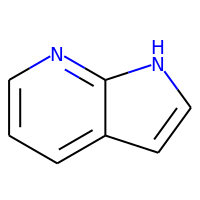
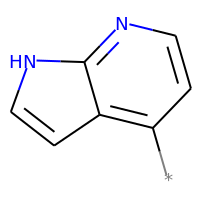
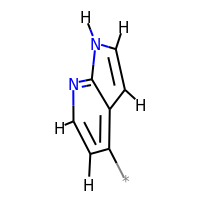
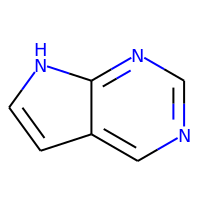
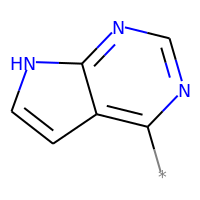
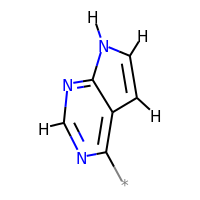
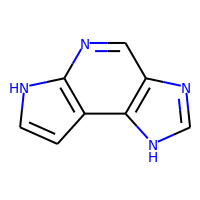
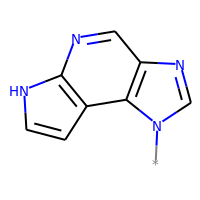
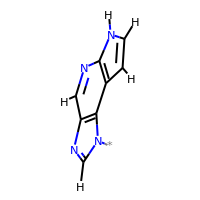

In [10]:
fragment_library_reduced['AP'].head(3)

### 1.3. Load fragment library custom filtered

In [11]:
fragment_library_custom = utils.read_fragment_library(PATH_DATA / "fragment_library_custom_filtered")
pd.concat(fragment_library_custom).shape

(388, 15)

,ROMol,ROMol_dummy,ROMol_original,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,atom_subpockets,atom_environments,smiles,smiles_dummy,subpocket
0,,,,ACTR2,STKR,TKL,3q4t,TAK,A,B,AP AP AP AP AP AP AP AP AP AP AP AP SE GA,16 16 16 16 16 16 16 16 16 16 16 16 na na,c1cnc2ccnn2c1,*c1cnc2c(*)cnn2c1,AP
1,,,,ACTR2,STKR,TKL,3soc,GVD,A,A,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP A...,15 15 15 15 15 15 15 15 14 14 14 14 14 14 14 5...,Nc1cc(C2CC2)[nH]n1,*Nc1cc(C2CC2)[nH]n1,AP
2,,,,AKT1,Akt,AGC,3mv5,XFE,B,A,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP A...,16 16 16 16 16 16 16 16 16 16 16 16 8 8 8 8 na,Cc1c[nH]c2ncncc12,*c1ncnc2[nH]cc(C)c12,AP

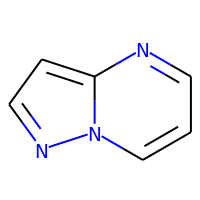
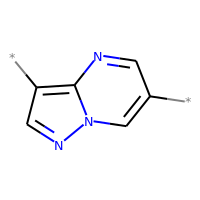
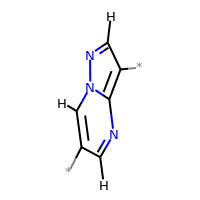
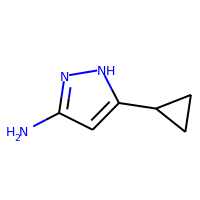
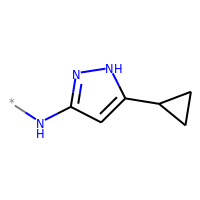
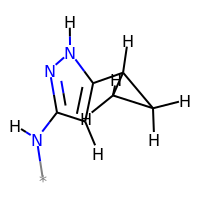
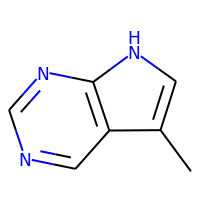
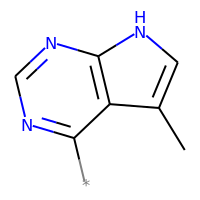
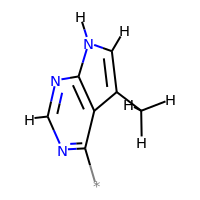

In [12]:
fragment_library_custom['AP'].head(3)

### 1.4. Check which fragments from are contained in the subsets

In [13]:
def frag_in_subset(fragment_library_original, fragment_library_subset, colname):
    fragment_library_concat = pd.concat(fragment_library_original).reset_index(drop=True)
    fragment_library_reduced_concat = pd.concat(fragment_library_subset).reset_index(drop=True)
    bool_reduced = []
    for i, row in fragment_library_concat.iterrows():
        notfound = True
        for j, reduced_row in fragment_library_reduced_concat.iterrows():
            if row['smiles'] == reduced_row['smiles']:
                bool_reduced.append(1)
                notfound = False
                break
        if notfound:
            bool_reduced.append(0)
    fragment_library_concat[colname] = bool_reduced
    fraglib = filters.prefilters._make_df_dict(fragment_library_concat)
    return(fraglib)

In [14]:
fragment_library = frag_in_subset(fragment_library, fragment_library_reduced, colname = "bool_reduced")

In [15]:
fragment_library = frag_in_subset(fragment_library, fragment_library_custom, colname = "bool_custom")

,subpocket,smiles,ROMol,ROMol_dummy,ROMol_original,kinase,family,group,complex_pdb,ligand_pdb,alt,chain,atom_subpockets,atom_environments,smiles_dummy,fragment_count,connections,connections_name,bool_reduced,bool_custom
0,AP,Nc1c[nH]c2ncccc12,,,,AAK1,NAK,Other,5l4q,LKB,B,A,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP F...,16 16 16 16 16 16 16 16 16 16 16 16 16 5 5 na na,[11*]c1cnc2[nH]cc(N[27*])c2c1,3,"[FP, SE]","[AP=FP, AP=SE]",0,0
1,AP,N/C(=C1\C(=O)Nc2ccccc21)c1ccccc1,,,,AAK1,NAK,Other,5te0,XIN,,A,AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP A...,7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 ...,[12*]N/C(=C1\C(=O)Nc2cc([20*])ccc21)c1ccccc1,3,"[SE, GA]","[AP=SE, AP=GA]",0,0
2,AP,Cc1cc(N)[nH]n1,,,,ABL1,Abl,TK,2f4j,VX6,,A,AP AP AP AP AP AP AP AP AP AP AP AP AP SE,5 5 14 14 14 14 14 14 14 8 8 8 8 na,[22*]Nc1cc(C)n[nH]1,9,[SE],[AP=SE],1,0

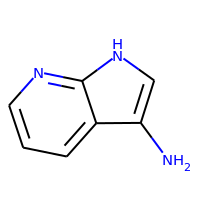
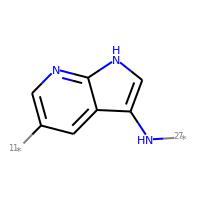
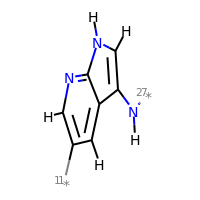
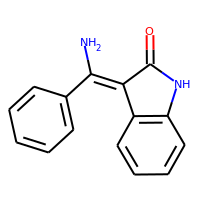
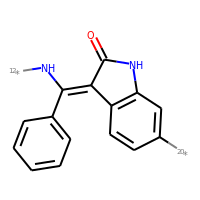
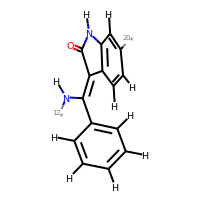
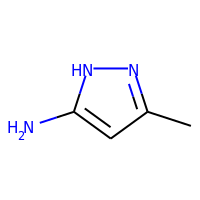
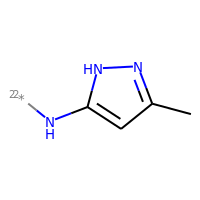
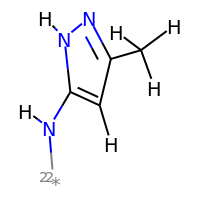

In [16]:
fragment_library["AP"].head(3)

## 2. t-SNE plots
* 2.1. Comparing fragment library sets
        - Fragment library pre-filtered vs. fragment library reduced
        - Fragment library pre-filtered vs. fragment library custom filtered
        - Fragment library pre-filtered vs. fragment library reduced vs. custom filtered
    
* 2.2. Comparing single custom filtering steps

T-Distributed Stochastic Neighbor Embedding (t-SNE) plots can be used to visualize hogh dimensional data in a low dimensional space showing clusters.
We will use them to compare the included and excluded fragments in the fragment libraries and the filtering steps

In [183]:
import seaborn as sns
from rdkit.Chem import MACCSkeys
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


def create_tsne_plots(fragment_library):
    fragment_library_concat = pd.concat(fragment_library).reset_index(drop=True)
    fragment_library_concat["maccs"] = fragment_library_concat.ROMol.apply(MACCSkeys.GenMACCSKeys)
    
    pca = PCA(n_components=50)
    crds = pca.fit_transform(list(fragment_library_concat["maccs"]))
    
    crds_embedded = TSNE(n_components=2).fit_transform(crds)


    tsne_df = pd.DataFrame(crds_embedded,columns=["X","Y"])
    tsne_df['reduced'] = fragment_library_concat["bool_reduced"] #add bool column from filtering steps here
    tsne_df['custom'] = fragment_library_concat["bool_custom"]
    # create column defining if fragment is
        # exluded in both subsets (0)
        # excluded in reduced (1)
        # excluded in custom (2)
        # accepted in both subsets (3)
    bool_compare = []
    for i, row in fragment_library_concat.iterrows():
        if row["bool_reduced"] == 0 and row["bool_custom"] == 0:
            bool_compare.append(0)
        elif row["bool_reduced"] == 0 and row["bool_custom"] == 1:
            bool_compare.append(1)
        elif row["bool_reduced"] == 1 and row["bool_custom"] == 0:
            bool_compare.append(2)
        elif row["bool_reduced"] == 1 and row["bool_custom"] == 1:
            bool_compare.append(3)
    tsne_df["compare"] = bool_compare
    num0 = len(tsne_df[tsne_df["compare"] == 0])
    num1 = len(tsne_df[tsne_df["compare"]==1])
    num2 = len(tsne_df[tsne_df["compare"]==2])
    num3 = len(tsne_df[tsne_df["compare"]==3])


    fig = plt.figure(figsize=(13,10))
    plt.subplot(2, 2, 1)
    ax1 = fig.add_subplot(2,2,1)
    ax1 = sns.scatterplot(data=tsne_df.query("reduced == 0"),x="X",y="Y",color='lightcoral', alpha=0.5).set_title("pre_filtered vs. reduced")
    ax1 = sns.scatterplot(data=tsne_df.query("reduced == 1"),x="X",y="Y",color='green', alpha=0.5)
    plt.axis('off')
    
    plt.subplot(2, 2, 2)
    ax2 = fig.add_subplot(2,2,2)
    ax2 = sns.scatterplot(data=tsne_df.query("custom == 0"),x="X",y="Y",color='lightcoral', alpha=0.5).set_title("pre-filtered vs. custom")
    ax2 = sns.scatterplot(data=tsne_df.query("custom == 1"),x="X",y="Y",color='green', alpha=0.5)
    plt.axis('off')
    
    plt.subplot(2, 2, 3)
    ax2 = fig.add_subplot(2, 2, 3)
    ax2 = sns.scatterplot(data=tsne_df.query("compare == 0"),x="X",y="Y",color='lightcoral', alpha=0.5).set_title("pre-filtered vs. reduced vs. custom")
    ax2 = sns.scatterplot(data=tsne_df.query("compare == 1"),x="X",y="Y",color='orange', alpha=0.5)
    ax2 = sns.scatterplot(data=tsne_df.query("compare == 2"),x="X",y="Y",color='lightblue', alpha=0.5)
    ax2 = sns.scatterplot(data=tsne_df.query("compare == 3"),x="X",y="Y",color='green', alpha=0.5)
    
    plt.axis('off')
    plt.show()
    print("%s Pre-filtered fragments. \n Number of fragments excluded in both datasets: %s \n Number of fragments excluded in the reduced dataset but included in the custom dataset: %s \n Number of fragments excluded in the custom dataset but included in the reduced dataset: %s \n Number if fragments in both datasets: %s " %(len(tsne_df["compare"]),num0, num1, num2, num3))

### 2.1. Comparing fragment library sets

/home/nona/anaconda3/envs/kinfraglib/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/nona/anaconda3/envs/kinfraglib/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


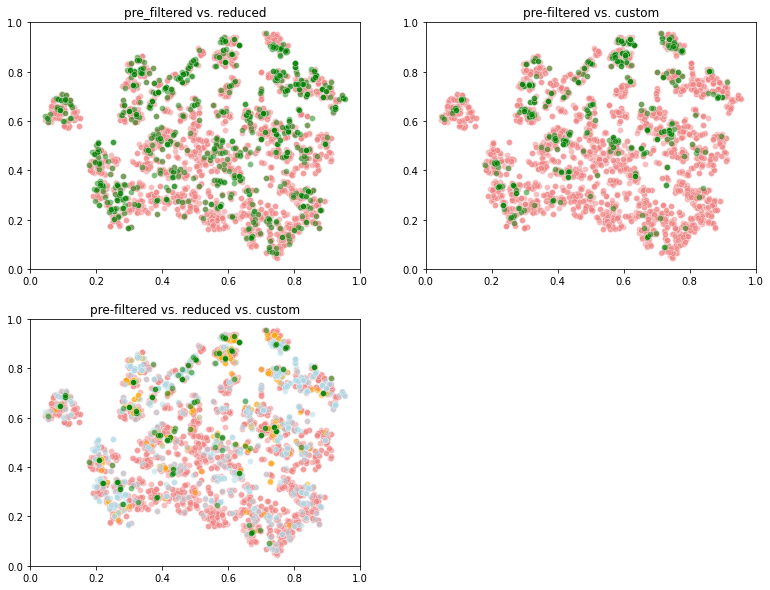

2862 Pre-filtered fragments. 
 Number of fragments excluded in both datasets: 1859 
 Number of fragments excluded in the reduced dataset but included in the custom dataset: 226 
 Number of fragments excluded in the custom dataset but included in the reduced dataset: 605 
 Number if fragments in both datasets: 172 


In [184]:
create_tsne_plots(fragment_library)

### 2.2 Comparing single custom filtering steps

Read in file where single filtering step results are saved

In [20]:
saved_filter_results = pd.read_csv(PATH_DATA_CUSTOM / "custom_filter_results.csv")
saved_filter_results.head()

,smiles,subpocket,bool_pains,bool_brenk,bool_ro3,bool_qed,qed,bool_bb,bool_syba,syba,retro_count,bool_retro
0,Nc1c[nH]c2ncccc12,AP,1,1,1,1,0.565900,1,1,30.950959,0.0,0.0
1,N/C(=C1\C(=O)Nc2ccccc21)c1ccccc1,AP,1,0,1,1,0.747185,0,1,17.682659,NaN,NaN
2,Cc1cc(N)[nH]n1,AP,1,1,1,0,0.488854,1,1,15.727015,NaN,NaN
3,Nc1ncc(C=O)s1,AP,1,0,1,1,0.561340,1,1,12.789242,NaN,NaN
4,COCC(=O)n1cc2[nH]nc(NC=O)c2c1,AP,1,0,0,1,0.723961,0,1,14.653939,NaN,NaN


In [185]:
import seaborn as sns
from rdkit.Chem import MACCSkeys
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


def create_tsne_plots_filters(fragment_library, saved_filter_results):
    fragment_library_concat = pd.concat(fragment_library).reset_index(drop=True)
    fragment_library_concat["maccs"] = fragment_library_concat.ROMol.apply(MACCSkeys.GenMACCSKeys)
    
    pca = PCA(n_components=50)
    crds = pca.fit_transform(list(fragment_library_concat["maccs"]))
    
    crds_embedded = TSNE(n_components=2).fit_transform(crds)


    tsne_df = pd.DataFrame(crds_embedded,columns=["X","Y"])
    tsne_df['pains'] = saved_filter_results["bool_pains"] #add bool column from filtering steps here
    tsne_df['brenk'] = saved_filter_results["bool_brenk"]
    tsne_df['ro3'] = saved_filter_results["bool_ro3"]
    tsne_df["qed"] = saved_filter_results["bool_qed"]
    tsne_df['bb'] = saved_filter_results["bool_bb"]
    tsne_df['syba'] = saved_filter_results["bool_syba"]
    tsne_df['retro'] = saved_filter_results["bool_retro"]


    fig = plt.figure(figsize=(15,15))
    plt.subplot(4, 2, 1)
    ax1 = fig.add_subplot(4,2,1)
    ax1 = sns.scatterplot(data=tsne_df.query("pains == 1"),x="X",y="Y",color='green', alpha=0.5).set_title("PAINS")
    ax1 = sns.scatterplot(data=tsne_df.query("pains == 0"),x="X",y="Y",color='lightcoral')
    plt.axis('off')
    
    plt.subplot(4, 2, 2)
    ax2 = fig.add_subplot(4,2,2)
    ax2 = sns.scatterplot(data=tsne_df.query("brenk == 1"),x="X",y="Y",color='green', alpha=0.5).set_title("Brenk")
    ax2 = sns.scatterplot(data=tsne_df.query("brenk == 0"),x="X",y="Y",color='lightcoral')
    plt.axis('off')
    
    plt.subplot(4, 2, 3)
    ax3 = fig.add_subplot(4, 2, 3)
    ax3 = sns.scatterplot(data=tsne_df.query("ro3 == 1"),x="X",y="Y",color='green', alpha=0.5).set_title("Ro3")
    ax3 = sns.scatterplot(data=tsne_df.query("ro3 == 0"),x="X",y="Y",color='lightcoral')
    plt.axis('off')
    
    plt.subplot(4, 2, 4)
    ax4 = fig.add_subplot(4, 2, 4)
    ax4 = sns.scatterplot(data=tsne_df.query("qed == 1"),x="X",y="Y",color='green', alpha=0.5).set_title("QED")
    ax4 = sns.scatterplot(data=tsne_df.query("qed == 0"),x="X",y="Y",color='lightcoral')
    plt.axis('off')
    
    plt.subplot(4, 2, 5)
    ax5 = fig.add_subplot(4, 2, 5)
    ax5 = sns.scatterplot(data=tsne_df.query("bb == 1"),x="X",y="Y",color='green', alpha=0.5).set_title("Building Blocks")
    ax5 = sns.scatterplot(data=tsne_df.query("bb == 0"),x="X",y="Y",color='lightcoral')
    plt.axis('off')
    
    plt.subplot(4, 2, 6)
    ax6 = fig.add_subplot(4, 2, 6)
    ax6 = sns.scatterplot(data=tsne_df.query("syba == 1"),x="X",y="Y",color='green', alpha=0.5).set_title("SYBA")
    ax6 = sns.scatterplot(data=tsne_df.query("syba == 0"),x="X",y="Y",color='lightcoral')
    plt.axis('off')
    
    plt.subplot(4, 2, 7)
    ax7 = fig.add_subplot(4, 2, 7)
    ax7 = sns.scatterplot(data=tsne_df.query("retro == 1"),x="X",y="Y",color='green', alpha=0.5).set_title("Pairwise Retrosynthesizability")
    ax7 = sns.scatterplot(data=tsne_df.query("retro == 0"),x="X",y="Y",color='lightcoral', alpha=0.5)
    plt.axis('off')
    plt.show()

/home/nona/anaconda3/envs/kinfraglib/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/nona/anaconda3/envs/kinfraglib/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


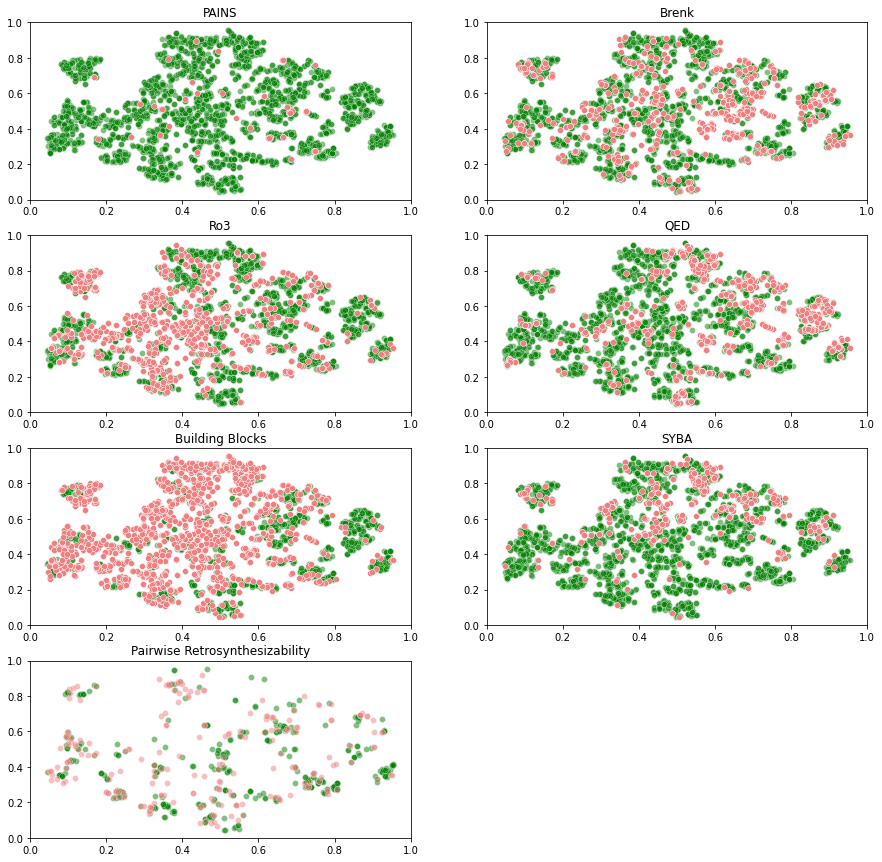

In [186]:
create_tsne_plots_filters(fragment_library, saved_filter_results)

## 3. Most common fragments per subpocket
* 3.1. Fragment library pre-filtered
* 3.2. Fragment library reduced
* 3.3. Fragment library custom filtered

In [22]:
# complete library??

In [23]:
subpocket = "all"
most_common_fragments = filters.pipeline_analysis.get_clustered_most_common_fragments(fragment_library, subpocket)

Number of molecules: 88
Threshold:  0.6
Number of clusters:  41
# Clusters with only 1 molecule:  24
# Clusters with more than 5 molecules:  4
# Clusters with more than 25 molecules:  0
# Clusters with more than 100 molecules:  0


### 3.1. Fragment library pre-filtered

In [23]:
subpocket = 'AP'
most_common_fragments = filters.pipeline_analysis.get_clustered_most_common_fragments(fragment_library, subpocket)

Number of molecules: 496
Threshold:  0.6
Number of clusters:  122
# Clusters with only 1 molecule:  64
# Clusters with more than 5 molecules:  21
# Clusters with more than 25 molecules:  1
# Clusters with more than 100 molecules:  0


Legend: cluster ID | fragment count


/home/nona/anaconda3/envs/kinfraglib/lib/python3.8/site-packages/rdkit/Chem/Draw/IPythonConsole.py:186: UserWarning: Truncating the list of molecules to be displayed to 100. Change the maxMols value to display more.
  warnings.warn(


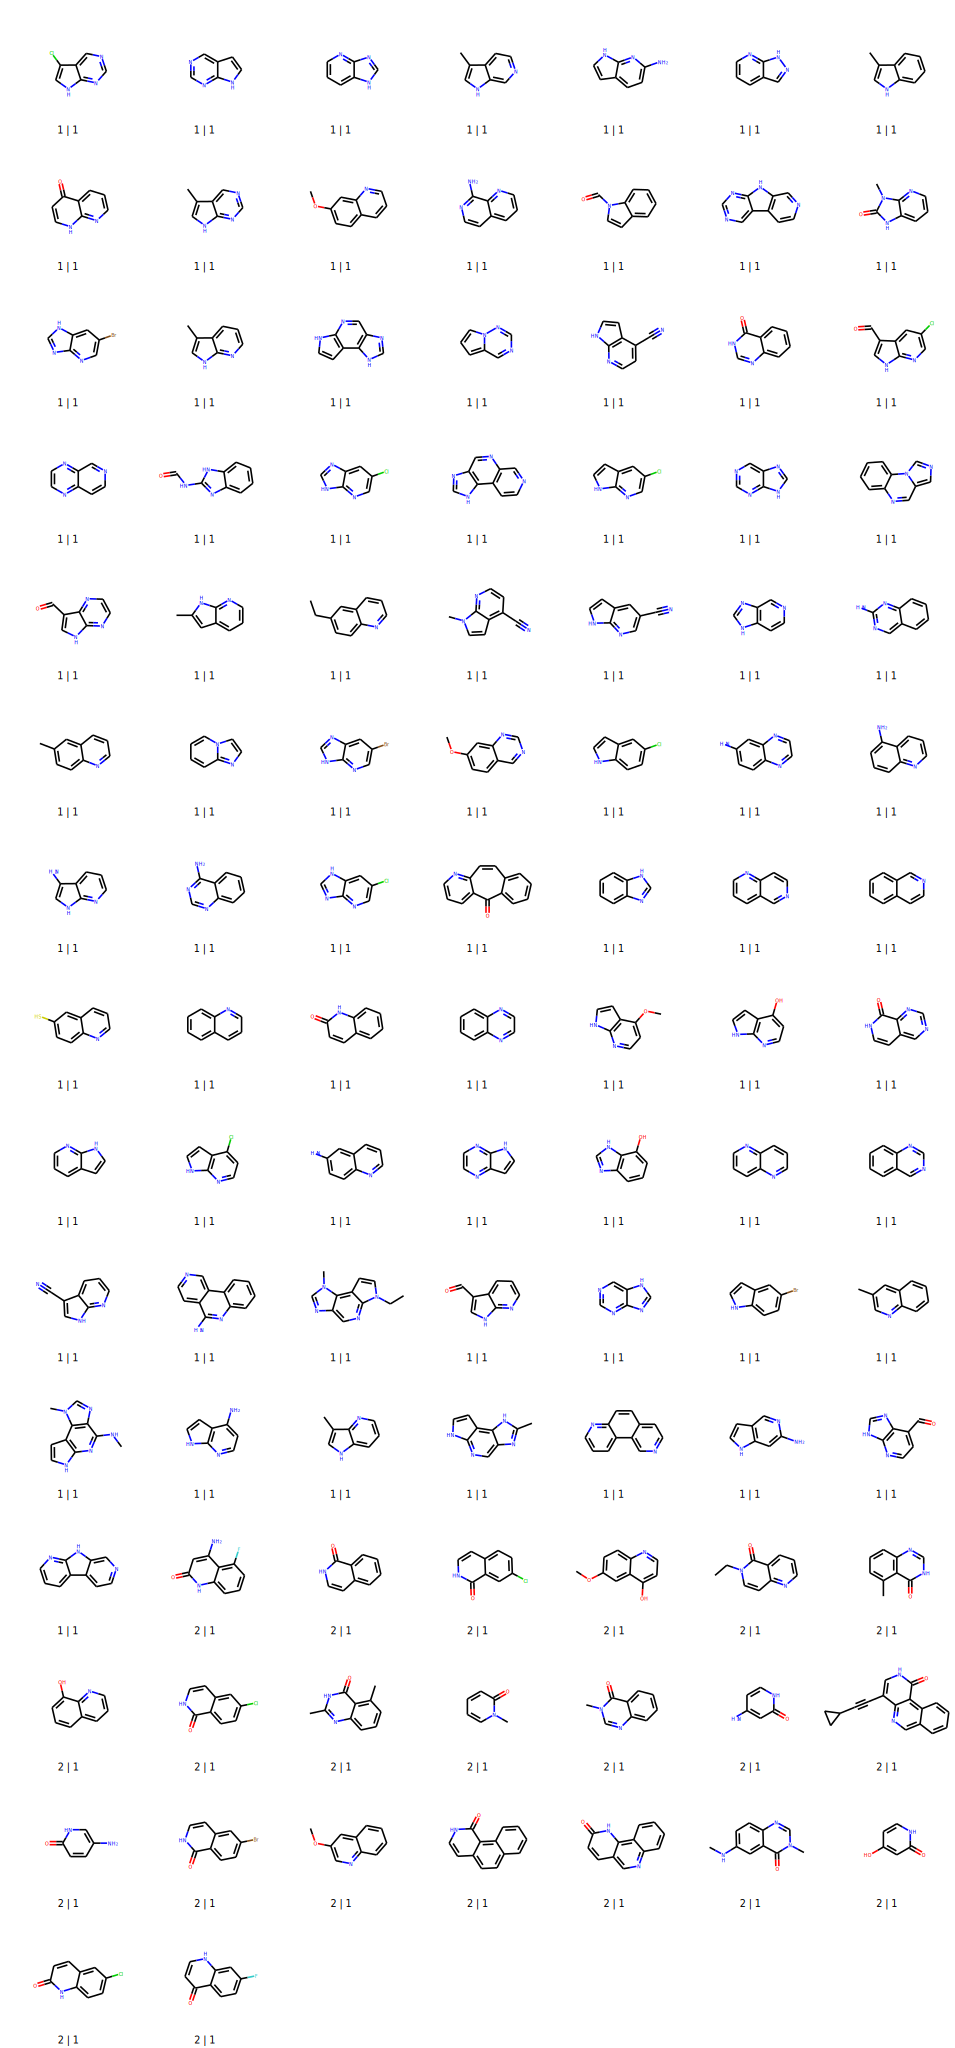

In [25]:
filters.pipeline_analysis.draw_clusters(most_common_fragments, subpocket, None)

### 3.2. Fragment library reduced

In [26]:
most_common_fragments_reduced = filters.pipeline_analysis.get_clustered_most_common_fragments(fragment_library_reduced, subpocket)

Number of molecules: 145
Threshold:  0.6
Number of clusters:  101
# Clusters with only 1 molecule:  85
# Clusters with more than 5 molecules:  2
# Clusters with more than 25 molecules:  0
# Clusters with more than 100 molecules:  0


Legend: cluster ID | fragment count


/home/nona/anaconda3/envs/kinfraglib/lib/python3.8/site-packages/rdkit/Chem/Draw/IPythonConsole.py:186: UserWarning: Truncating the list of molecules to be displayed to 100. Change the maxMols value to display more.
  warnings.warn(


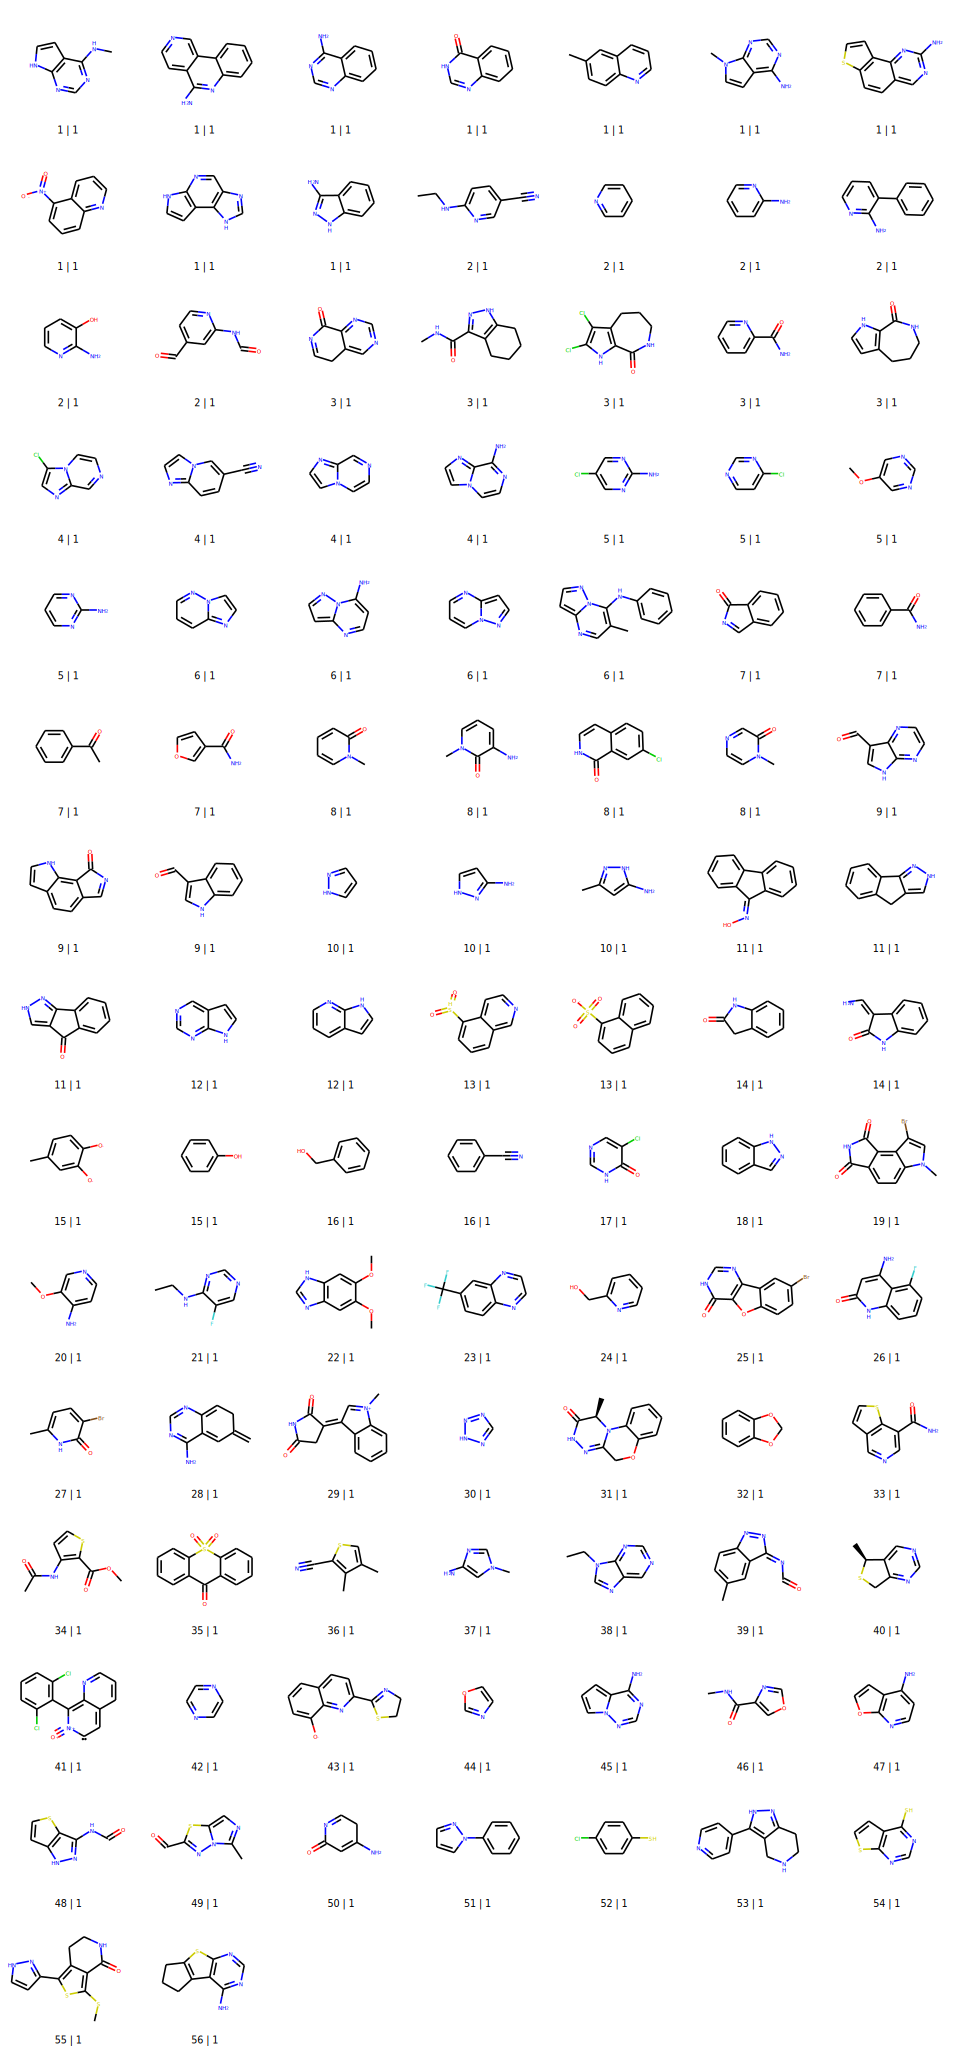

In [28]:
filters.pipeline_analysis.draw_clusters(most_common_fragments_reduced, subpocket, None)

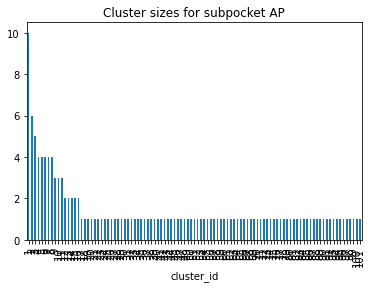

In [29]:
filters.pipeline_analysis.plot_cluster_sizes(most_common_fragments_reduced, subpocket)

### 3.3. Fragment library custom filtered

## 4. Connection frequecy between subpockets

In [80]:
def connection_frequencies(fragment_library, fragment_library_reduced, fragment_library_custom):
    # fragment library pre-filtered
    fragment_library_concat = pd.concat(fragment_library)
    connections_by_fragment = utils.get_connections_by_fragment(fragment_library_concat)
    connections_by_ligand = connections_by_fragment.groupby(
        ['kinase', 'complex_pdb', 'ligand_pdb']
    )['connections_name'].sum()
    connections_by_ligand_count = connections_by_ligand.apply(lambda x: Counter(x))
    # Get connection count across ligands (count each connection per ligand only once)
    connections_across_ligands_count = pd.Series(Counter(connections_by_ligand_count.apply(list).sum()))
    connections_across_ligands_count.name = 'count_pre-filtered'

    # Get connection frequency (100% = all ligands)
    connections_across_ligands_frequency = connections_across_ligands_count.apply(lambda x: round((x / connections_by_ligand_count.shape[0] * 100), 1))
    connections_across_ligands_frequency.name = 'frequency_pre-filtered'

    # Concatenate count and frequency data to DataFrame
    connections_across_ligands = pd.concat([connections_across_ligands_count, connections_across_ligands_frequency], axis=1)
    
    # fragment library reduced
    fragment_library_reduced_concat = pd.concat(fragment_library_reduced)
    connections_by_fragment_reduced = utils.get_connections_by_fragment(fragment_library_reduced_concat)
    
    connections_by_ligand_reduced = connections_by_fragment_reduced.groupby(
        ['kinase', 'complex_pdb', 'ligand_pdb']
    )['connections_name'].sum()
    connections_by_ligand_count_reduced = connections_by_ligand_reduced.apply(lambda x: Counter(x))
    
    # Get connection count across ligands (count each connection per ligand only once)
    connections_across_ligands_count_reduced = pd.Series(Counter(connections_by_ligand_count_reduced.apply(list).sum()))
    connections_across_ligands_count_reduced.name = 'count_reduced'

    # Get connection frequency (100% = all ligands)
    connections_across_ligands_frequency_reduced = connections_across_ligands_count_reduced.apply(lambda x: round((x / connections_by_ligand_count_reduced.shape[0] * 100), 1))
    connections_across_ligands_frequency_reduced.name = 'frequency_reduced'

    # Concatenate count and frequency data to DataFrame
    connections_across_ligands_reduced = pd.concat([connections_across_ligands_count_reduced, connections_across_ligands_frequency_reduced], axis=1)
    
    #fragment library custom filtered
    fragment_library_custom_concat = pd.concat(fragment_library_custom)
    connections_by_fragment_custom = utils.get_connections_by_fragment(fragment_library_custom_concat)
    
    connections_by_ligand_custom = connections_by_fragment_custom.groupby(
        ['kinase', 'complex_pdb', 'ligand_pdb']
    )['connections_name'].sum()
    connections_by_ligand_count_custom = connections_by_ligand_custom.apply(lambda x: Counter(x))
    
    # Get connection count across ligands (count each connection per ligand only once)
    connections_across_ligands_count_custom = pd.Series(Counter(connections_by_ligand_count_custom.apply(list).sum()))
    connections_across_ligands_count_custom.name = 'count_custom-filtered'

    # Get connection frequency (100% = all ligands)
    connections_across_ligands_frequency_custom = connections_across_ligands_count_custom.apply(lambda x: round((x / connections_by_ligand_count_custom.shape[0] * 100), 1))
    connections_across_ligands_frequency_custom.name = 'frequency_custom_filtered'

    # Concatenate count and frequency data to DataFrame
    connections_across_ligands_custom = pd.concat([connections_across_ligands_count_custom, connections_across_ligands_frequency_custom], axis=1)
    
    frequencies =  pd.concat([connections_across_ligands["frequency_pre-filtered"], connections_across_ligands_reduced["frequency_reduced"], connections_across_ligands_custom["frequency_custom_filtered"]], axis=1)

    ax = frequencies.plot.bar()
    fig = ax.get_figure()

    fig.set_figheight(5)
    fig.set_figwidth(13)

    ax.set_xlabel("Subpocket")
    ax.set_ylabel("Connection Frequency")
    ax.set_title("Connection Frequencies of the different subsets")
    
    fig.show()
    
    return pd.concat([connections_across_ligands, connections_across_ligands_reduced, connections_across_ligands_custom], axis=1)

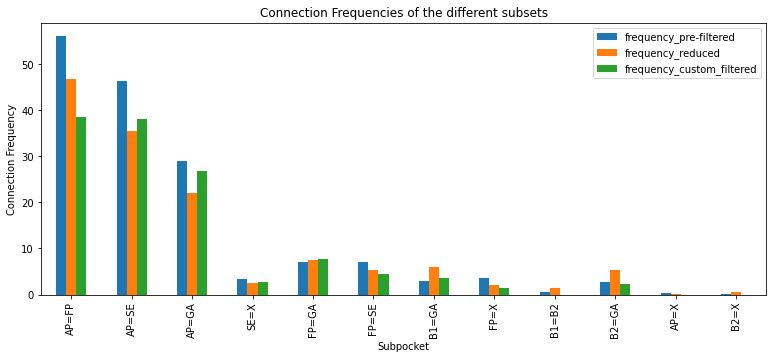

In [81]:
con_frequencies = connection_frequencies(fragment_library, fragment_library_reduced, fragment_library_custom)

In [33]:
con_frequencies

,count_pre-filtered,frequency_pre-filtered,count_reduced,frequency_reduced,count_custom-filtered,frequency_custom_filtered
AP=FP,1026,56.2,254,46.9,140.0,38.5
AP=SE,848,46.4,193,35.6,139.0,38.2
AP=GA,528,28.9,120,22.1,98.0,26.9
SE=X,63,3.4,13,2.4,10.0,2.7
FP=GA,129,7.1,41,7.6,28.0,7.7
FP=SE,128,7.0,29,5.4,16.0,4.4
B1=GA,54,3.0,32,5.9,13.0,3.6
FP=X,68,3.7,11,2.0,5.0,1.4
B1=B2,9,0.5,8,1.5,NaN,NaN
B2=GA,49,2.7,29,5.4,8.0,2.2


## 5. Fragment similarity per subpocket


ToDo: put tables and plots together for better comparison

In [83]:
similarities_per_subpocket = utils.get_fragment_similarity_per_subpocket(pd.concat(fragment_library))
similarities_per_subpocket_reduced = utils.get_fragment_similarity_per_subpocket(pd.concat(fragment_library_reduced))
similarities_per_subpocket_custom = utils.get_fragment_similarity_per_subpocket(pd.concat(fragment_library_custom))
mean_similarities = pd.concat(
    [
        similarities_per_subpocket.groupby('subpocket', sort=False).mean(),
        similarities_per_subpocket_reduced.groupby('subpocket', sort=False).mean(),
        similarities_per_subpocket_custom.groupby('subpocket', sort=False).mean(),
    ],
    axis=1,
)
mean_similarities.columns=["similarity_pre-filtered", "similarity_reduced", "similarity_custom"]
mean_similarities

,similarity_pre-filtered,similarity_reduced,similarity_custom
subpocket,,,
AP,0.140770,0.111311,0.161415
FP,0.089188,0.069282,0.129486
SE,0.102719,0.076425,0.144180
GA,0.104821,0.075186,0.166848
B1,0.074256,0.052510,0.143353
B2,0.091785,0.073320,0.149357


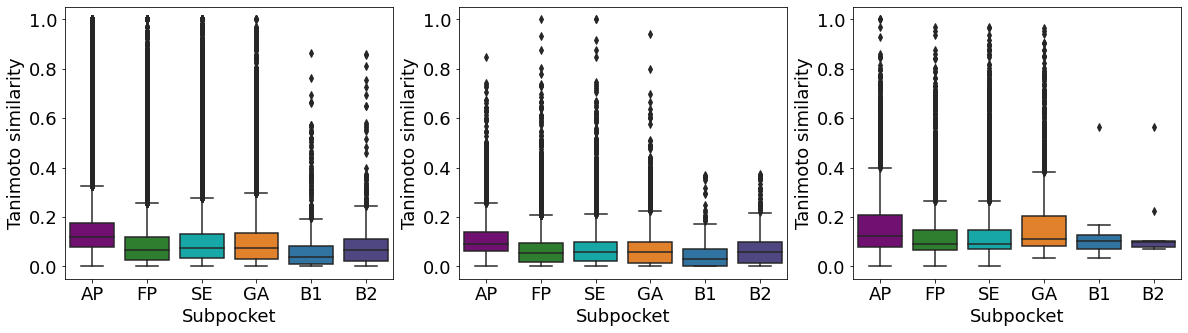

In [84]:
filters.pipeline_analysis.plot_fragment_similarity(
    [similarities_per_subpocket,
     similarities_per_subpocket_reduced,
     similarities_per_subpocket_custom],
    'Subpocket'
)

## 6. Fragment properties 
* 6.1. per subpocket for each set
* 6.2. per custom filter

1. one for each filter step
2. one for custom filtered library

### 6.1. per subpocket for each set 

In [85]:
def get_descriptors(fragment_library, fragment_library_reduced, fragment_library_custom):
    descriptors = utils.get_descriptors_by_fragments(fragment_library)
    descriptors_median = descriptors.groupby('subpocket').median()
    descriptors_reduced = utils.get_descriptors_by_fragments(fragment_library_reduced)
    descriptors_reduced_median = descriptors_reduced.groupby('subpocket').median()
    descriptors_custom = utils.get_descriptors_by_fragments(fragment_library_custom)
    descriptors_custom_median = descriptors_custom.groupby('subpocket').median()
   
    all_descriptors = pd.concat(
        [
            descriptors_median,
            descriptors_reduced_median,
            descriptors_custom_median,
        ],
        axis=1,
        keys=["pre-filtered", "reduced", "custom"]
    )
    # style creates strange floats
    # all_descriptors = all_descriptors.style.set_properties(**{"background-color": "lightgrey"}, subset=["pre-filtered", "custom"])
    display(all_descriptors)
    print("pre-filtered")
    plt = filters.pipeline_analysis.plot_fragment_descriptors(descriptors)
    plt.show()
    print("reduced")
    plt_reduced = filters.pipeline_analysis.plot_fragment_descriptors(descriptors_reduced)
    plt_reduced.show()
    print("custom")
    plt_custom = filters.pipeline_analysis.plot_fragment_descriptors(descriptors_custom)
    plt_custom.show()
    
    
    

pre-filtered                              reduced                 \
                 # HBD # HBA     LogP # Heavy atoms   # HBD # HBA     LogP   
subpocket                                                                    
AP                 1.0   3.0  1.13848          12.0     1.0   3.0  1.19270   
B1                 1.0   1.5  1.15670           7.5     0.0   1.0  1.15670   
B2                 0.0   1.0  1.31735           9.0     0.0   1.0  1.31735   
FP                 1.0   2.0  0.72930          10.0     1.0   2.0  1.03165   
GA                 1.0   1.0  1.40790           9.0     1.0   2.0  1.18690   
SE                 1.0   2.0  0.98540          11.0     0.5   2.0  1.17985   

                        custom                               
          # Heavy atoms  # HBD # HBA     LogP # Heavy atoms  
subpocket                                                    
AP                 10.0      1     2  1.40080             9  
B1                  7.0      0     1  2.58520            10  
B2                  8.0      0     1  2.10040            10  
FP                  9.0      1     1  1.53850             9  
GA                  8.0      1     1  1.70062             9  
SE                 10.0      0     2  1.62150            10

pre-filtered


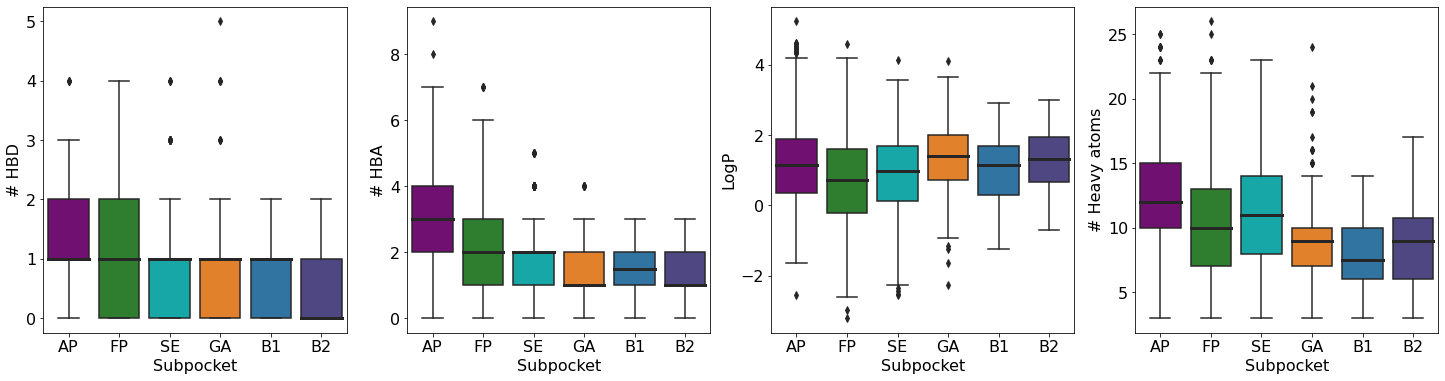

reduced


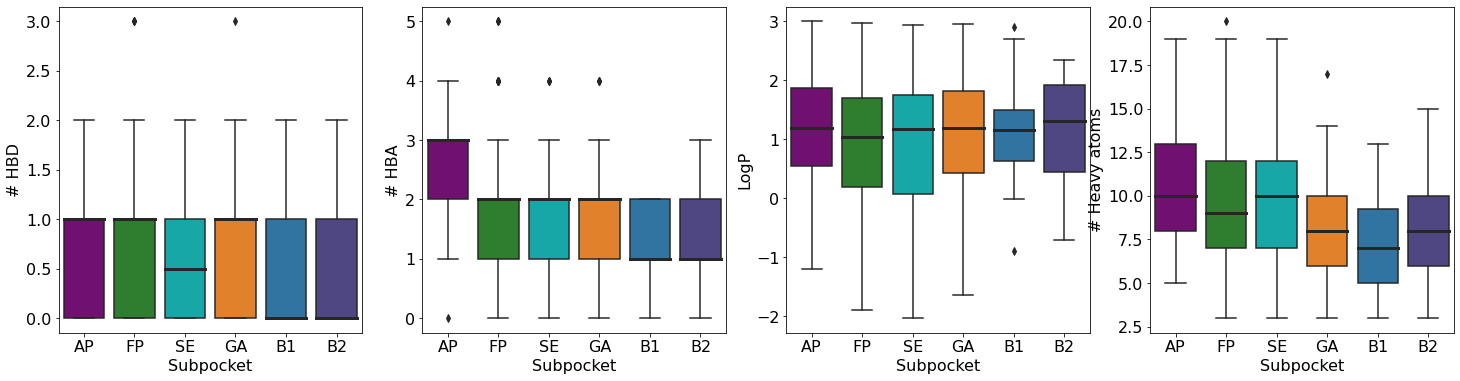

custom


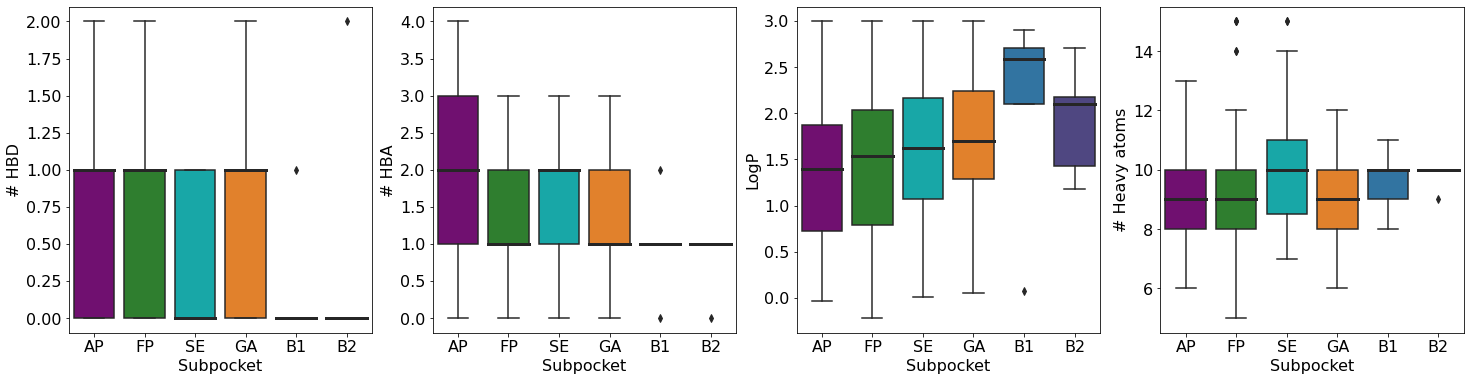

In [86]:
get_descriptors(fragment_library, fragment_library_reduced, fragment_library_custom)

### 6.2. per custom filter

In [ ]:
# get filter results file
# for every filter exclude fragments not passing and plot values

In [87]:
# read in results from all filters
filter_results = pd.read_csv(PATH_DATA_CUSTOM / "custom_filter_results.csv")
filter_results = filter_results.set_index(["subpocket", "smiles"])
filter_results.head(3)

bool_pains  bool_brenk  bool_ro3  \
subpocket smiles                                                               
AP        Nc1c[nH]c2ncccc12                          1           1         1   
          N/C(=C1\C(=O)Nc2ccccc21)c1ccccc1           1           0         1   
          Cc1cc(N)[nH]n1                             1           1         1   

                                            bool_qed       qed  bool_bb  \
subpocket smiles                                                          
AP        Nc1c[nH]c2ncccc12                        1  0.565900        1   
          N/C(=C1\C(=O)Nc2ccccc21)c1ccccc1         1  0.747185        0   
          Cc1cc(N)[nH]n1                           0  0.488854        1   

                                            bool_syba       syba  retro_count  \
subpocket smiles                                                                
AP        Nc1c[nH]c2ncccc12                         1  30.950959          0.0   
          N/C(=C1\C(=O)Nc2ccccc21)c1ccccc1          1  17.682659          NaN   
          Cc1cc(N)[nH]n1                            1  15.727015          NaN   

                                            bool_retro  
subpocket smiles                                        
AP        Nc1c[nH]c2ncccc12                        0.0  
          N/C(=C1\C(=O)Nc2ccccc21)c1ccccc1         NaN  
          Cc1cc(N)[nH]n1                           NaN

ROMol  \
subpocket smiles                                                                                
AP        Nc1c[nH]c2ncccc12                 <img data-content="rdkit/molecule" src="data:i...   
          N/C(=C1\C(=O)Nc2ccccc21)c1ccccc1  <img data-content="rdkit/molecule" src="data:i...   
          Cc1cc(N)[nH]n1                    <img data-content="rdkit/molecule" src="data:i...   

                                                                                  ROMol_dummy  \
subpocket smiles                                                                                
AP        Nc1c[nH]c2ncccc12                 <img data-content="rdkit/molecule" src="data:i...   
          N/C(=C1\C(=O)Nc2ccccc21)c1ccccc1  <img data-content="rdkit/molecule" src="data:i...   
          Cc1cc(N)[nH]n1                    <img data-content="rdkit/molecule" src="data:i...   

                                                                               ROMol_original  \
subpocket smiles                                                                                
AP        Nc1c[nH]c2ncccc12                 <img data-content="rdkit/molecule" src="data:i...   
          N/C(=C1\C(=O)Nc2ccccc21)c1ccccc1  <img data-content="rdkit/molecule" src="data:i...   
          Cc1cc(N)[nH]n1                    <img data-content="rdkit/molecule" src="data:i...   

                                           kinase family  group complex_pdb  \
subpocket smiles                                                              
AP        Nc1c[nH]c2ncccc12                  AAK1    NAK  Other        5l4q   
          N/C(=C1\C(=O)Nc2ccccc21)c1ccccc1   AAK1    NAK  Other        5te0   
          Cc1cc(N)[nH]n1                     ABL1    Abl     TK        2f4j   

                                           ligand_pdb alt chain  \
subpocket smiles                                                  
AP        Nc1c[nH]c2ncccc12                       LKB   B     A   
          N/C(=C1\C(=O)Nc2ccccc21)c1ccccc1        XIN         A   
          Cc1cc(N)[nH]n1                          VX6         A   

                                                                              atom_subpockets  \
subpocket smiles                                                                                
AP        Nc1c[nH]c2ncccc12                 AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP F...   
          N/C(=C1\C(=O)Nc2ccccc21)c1ccccc1  AP AP AP AP AP AP AP AP AP AP AP AP AP AP AP A...   
          Cc1cc(N)[nH]n1                            AP AP AP AP AP AP AP AP AP AP AP AP AP SE   

                                                                            atom_environments  \
subpocket smiles                                                                                
AP        Nc1c[nH]c2ncccc12                  16 16 16 16 16 16 16 16 16 16 16 16 16 5 5 na na   
          N/C(=C1\C(=O)Nc2ccccc21)c1ccccc1  7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 ...   
          Cc1cc(N)[nH]n1                                  5 5 14 14 14 14 14 14 14 8 8 8 8 na   

                                                                            smiles_dummy  \
subpocket smiles                                                                           
AP        Nc1c[nH]c2ncccc12                                [11*]c1cnc2[nH]cc(N[27*])c2c1   
          N/C(=C1\C(=O)Nc2ccccc21)c1ccccc1  [12*]N/C(=C1\C(=O)Nc2cc([20*])ccc21)c1ccccc1   
          Cc1cc(N)[nH]n1                                             [22*]Nc1cc(C)n[nH]1   

                                            fragment_count connections  \
subpocket smiles                                                         
AP        Nc1c[nH]c2ncccc12                              3    [FP, SE]   
          N/C(=C1\C(=O)Nc2ccccc21)c1ccccc1               3    [SE, GA]   
          Cc1cc(N)[nH]n1                                 9        [SE]   

                                           connections_name  bool_reduced  \
subpocket smiles 
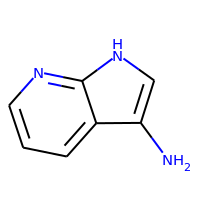
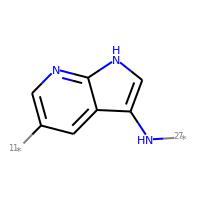
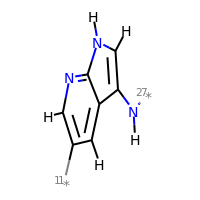
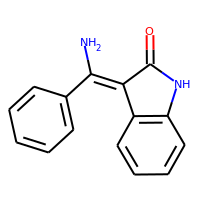
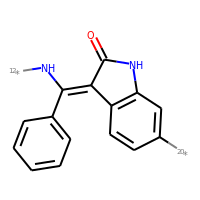
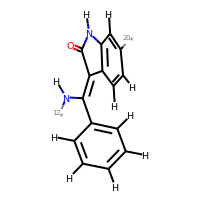
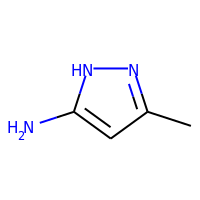
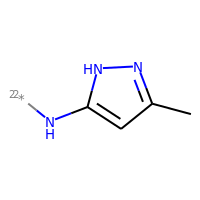
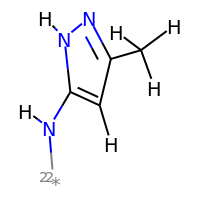

In [88]:
fragment_library_concat = pd.concat(fragment_library)
fragment_library_concat = fragment_library_concat.set_index(["subpocket", "smiles"])
fragment_library_concat.head(3)

ROMol  \
subpocket smiles                                                                                
AP        Nc1c[nH]c2ncccc12                 <img data-content="rdkit/molecule" src="data:i...   
          N/C(=C1\C(=O)Nc2ccccc21)c1ccccc1  <img data-content="rdkit/molecule" src="data:i...   
          Cc1cc(N)[nH]n1                    <img data-content="rdkit/molecule" src="data:i...   

                                                                                  ROMol_dummy  \
subpocket smiles                                                                                
AP        Nc1c[nH]c2ncccc12                 <img data-content="rdkit/molecule" src="data:i...   
          N/C(=C1\C(=O)Nc2ccccc21)c1ccccc1  <img data-content="rdkit/molecule" src="data:i...   
          Cc1cc(N)[nH]n1                    <img data-content="rdkit/molecule" src="data:i...   

                                                                               ROMol_original  \
subpocket smiles                                                                                
AP        Nc1c[nH]c2ncccc12                 <img data-content="rdkit/molecule" src="data:i...   
          N/C(=C1\C(=O)Nc2ccccc21)c1ccccc1  <img data-content="rdkit/molecule" src="data:i...   
          Cc1cc(N)[nH]n1                    <img data-content="rdkit/molecule" src="data:i...   

                                           kinase family  group complex_pdb  \
subpocket smiles                                                              
AP        Nc1c[nH]c2ncccc12                  AAK1    NAK  Other        5l4q   
          N/C(=C1\C(=O)Nc2ccccc21)c1ccccc1   AAK1    NAK  Other        5te0   
          Cc1cc(N)[nH]n1                     ABL1    Abl     TK        2f4j   

                                           ligand_pdb alt chain  ...  \
subpocket smiles                                                 ...   
AP        Nc1c[nH]c2ncccc12                       LKB   B     A  ...   
          N/C(=C1\C(=O)Nc2ccccc21)c1ccccc1        XIN         A  ...   
          Cc1cc(N)[nH]n1                          VX6         A  ...   

                                           bool_pains bool_brenk bool_ro3  \
subpocket smiles                                                            
AP        Nc1c[nH]c2ncccc12                         1          1        1   
          N/C(=C1\C(=O)Nc2ccccc21)c1ccccc1          1          0        1   
          Cc1cc(N)[nH]n1                            1          1        1   

                                            bool_qed       qed bool_bb  \
subpocket smiles                                                         
AP        Nc1c[nH]c2ncccc12                        1  0.565900       1   
          N/C(=C1\C(=O)Nc2ccccc21)c1ccccc1         1  0.747185       0   
          Cc1cc(N)[nH]n1                           0  0.488854       1   

                                            bool_syba       syba  retro_count  \
subpocket smiles                                                                
AP        Nc1c[nH]c2ncccc12                         1  30.950959          0.0   
          N/C(=C1\C(=O)Nc2ccccc21)c1ccccc1          1  17.682659          NaN   
          Cc1cc(N)[nH]n1                            1  15.727015          NaN   

                                            bool_retro  
subpocket smiles                                        
AP        Nc1c[nH]c2ncccc12                        0.0  
          N/C(=C1\C(=O)Nc2ccccc21)c1ccccc1         NaN  
          Cc1cc(N)[nH]n1                           NaN  

[3 rows x 28 columns]
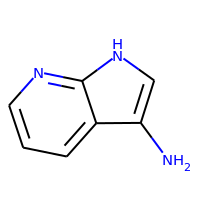
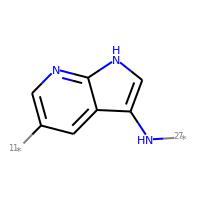
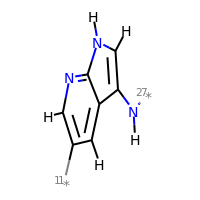
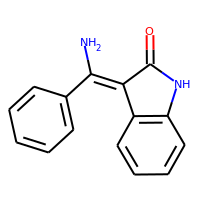
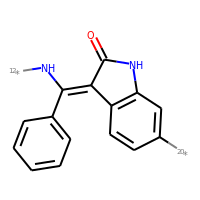
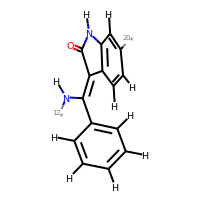
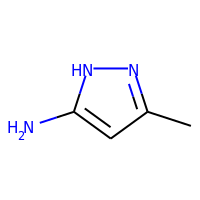
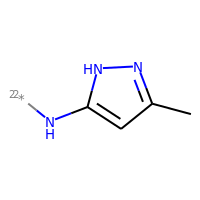
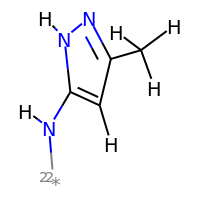

In [89]:
fraglib_filters = fragment_library_concat.merge(filter_results, left_on=['subpocket', 'smiles'], right_on=['subpocket', 'smiles'], how="outer")
fraglib_filters.head(3)

In [90]:
# get list of filters applied
frag_keys= fraglib_filters.keys()
frag_keys.to_list()
bool_keys = [x for x in frag_keys if "bool" in x]
bool_keys

['bool_reduced',
 'bool_custom',
 'bool_pains',
 'bool_brenk',
 'bool_ro3',
 'bool_qed',
 'bool_bb',
 'bool_syba',
 'bool_retro']

,smiles,ROMol,ROMol_dummy,ROMol_original,kinase,family,group,complex_pdb,ligand_pdb,alt,...,bool_pains,bool_brenk,bool_ro3,bool_qed,qed,bool_bb,bool_syba,syba,retro_count,bool_retro
subpocket,,,,,,,,,,,,,,,,,,,,,
AP,Nc1c[nH]c2ncccc12,,,,AAK1,NAK,Other,5l4q,LKB,B,...,1,1,1,1,0.565900,1,1,30.950959,0.0,0.0
AP,N/C(=C1\C(=O)Nc2ccccc21)c1ccccc1,,,,AAK1,NAK,Other,5te0,XIN,,...,1,0,1,1,0.747185,0,1,17.682659,NaN,NaN
AP,Cc1cc(N)[nH]n1,,,,ABL1,Abl,TK,2f4j,VX6,,...,1,1,1,0,0.488854,1,1,15.727015,NaN,NaN
AP,Nc1ncc(C=O)s1,,,,ABL1,Abl,TK,2gqg,1N1,B,...,1,0,1,1,0.561340,1,1,12.789242,NaN,NaN
AP,COCC(=O)n1cc2[nH]nc(NC=O)c2c1,,,,ABL1,Abl,TK,2v7a,627,,...,1,0,0,1,0.723961,0,1,14.653939,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B2,Nc1ccon1,,,,p38a,MAPK,CMGC,3mvm,39P,,...,1,1,1,0,0.490056,1,1,15.503600,NaN,NaN
B2,c1cnoc1,,,,p38a,MAPK,CMGC,3ocg,OCG,,...,1,1,1,0,0.447261,1,1,11.831072,NaN,NaN
B2,c1ccoc1,,,,p38a,MAPK,CMGC,4aa4,QC0,,...,1,1,1,0,0.446031,1,1,5.852398,NaN,NaN

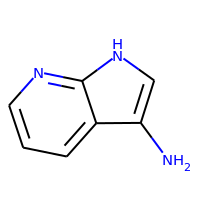
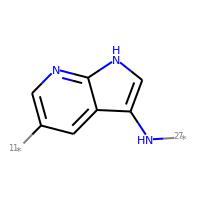
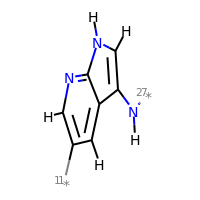
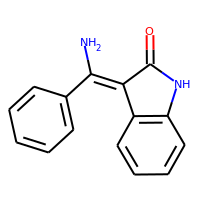
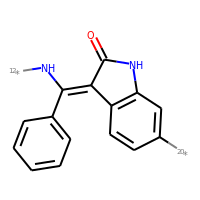
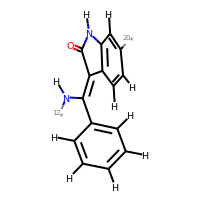
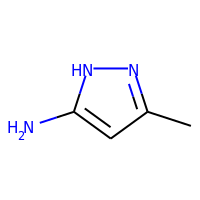
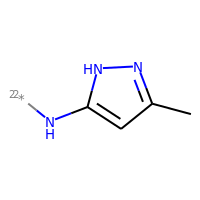
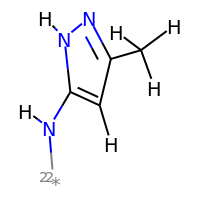
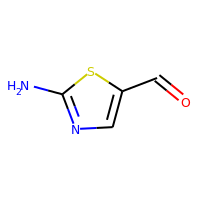
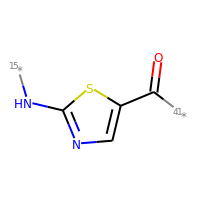
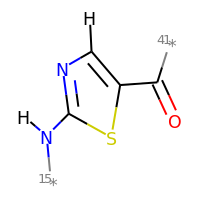
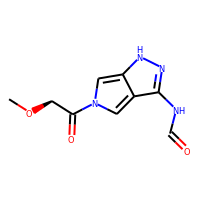
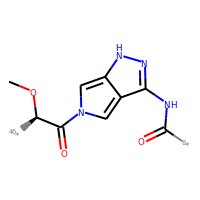
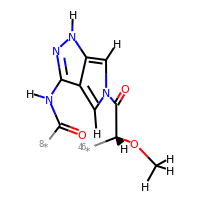
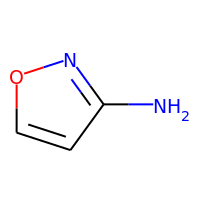
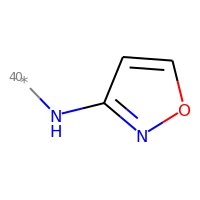
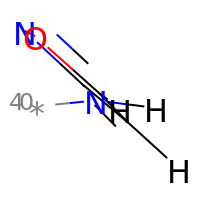
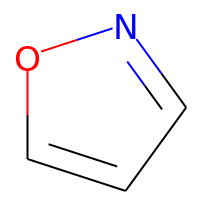
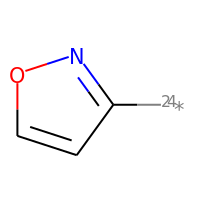
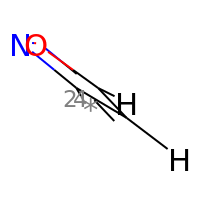
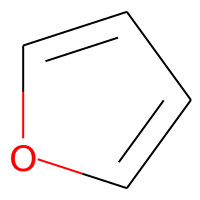
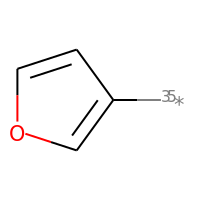
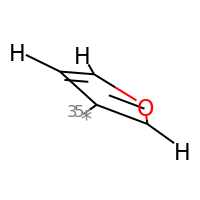
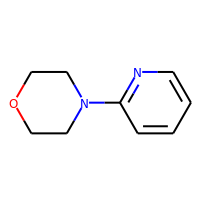
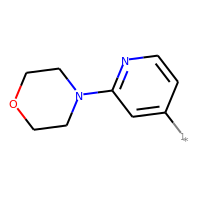
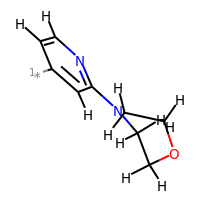
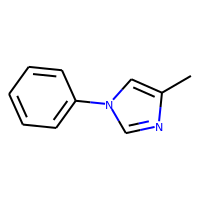
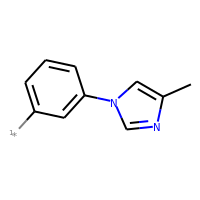
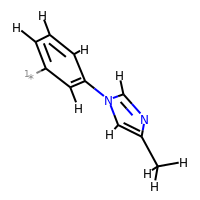

In [91]:
fraglib_filters = fraglib_filters.reset_index()
fraglib_filters.set_index(["subpocket"])

In [92]:
fragment_library_filter_res = filters.prefilters._make_df_dict(fraglib_filters)

,subpocket,smiles,ROMol,ROMol_dummy,ROMol_original,kinase,family,group,complex_pdb,ligand_pdb,...,bool_pains,bool_brenk,bool_ro3,bool_qed,qed,bool_bb,bool_syba,syba,retro_count,bool_retro
0,AP,Nc1c[nH]c2ncccc12,,,,AAK1,NAK,Other,5l4q,LKB,...,1,1,1,1,0.565900,1,1,30.950959,0.0,0.0
1,AP,N/C(=C1\C(=O)Nc2ccccc21)c1ccccc1,,,,AAK1,NAK,Other,5te0,XIN,...,1,0,1,1,0.747185,0,1,17.682659,NaN,NaN
2,AP,Cc1cc(N)[nH]n1,,,,ABL1,Abl,TK,2f4j,VX6,...,1,1,1,0,0.488854,1,1,15.727015,NaN,NaN

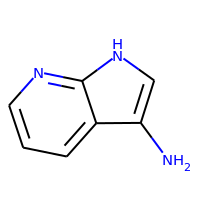
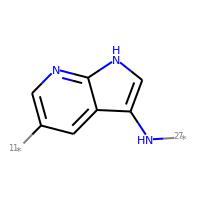
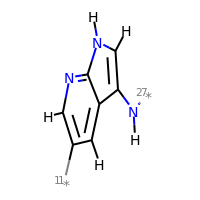
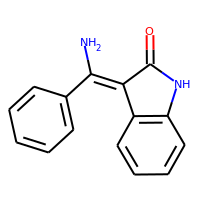
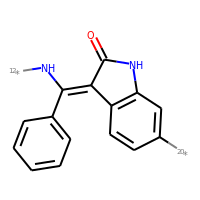
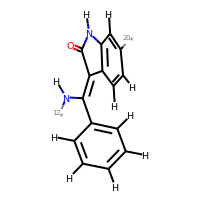
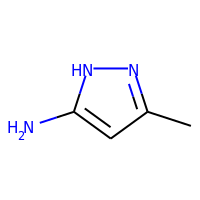
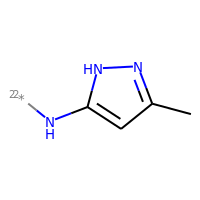
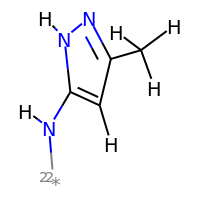

In [93]:
fragment_library_filter_res["AP"].head(3)

In [164]:
def get_descriptors_filters(fragment_library_filter_res, bool_keys):
    print("pre-filtered")
    descriptors = utils.get_descriptors_by_fragments(fragment_library_filter_res)
    descriptors_median = descriptors.groupby('subpocket').median()
    plt = filters.pipeline_analysis.plot_fragment_descriptors(descriptors)
    plt.show()
    descriptor_dfs = {"pre-filtered": descriptors_median}
    for bool_key in bool_keys:   
        fraglib_concat = pd.concat(fragment_library_filter_res)
        fraglib_filter = fraglib_concat[fraglib_concat[bool_key]==1]
        fraglib_filter = filters.prefilters._make_df_dict(fraglib_filter)
        descriptors = utils.get_descriptors_by_fragments(fraglib_filter)
        descriptors_median = descriptors.groupby('subpocket').median()
        descriptor_dfs[bool_key] = descriptors_median

        print(bool_key)
        # display(descriptors_median)
        plt = filters.pipeline_analysis.plot_fragment_descriptors(descriptors)
        plt.show()
    return(descriptor_dfs)

pre-filtered


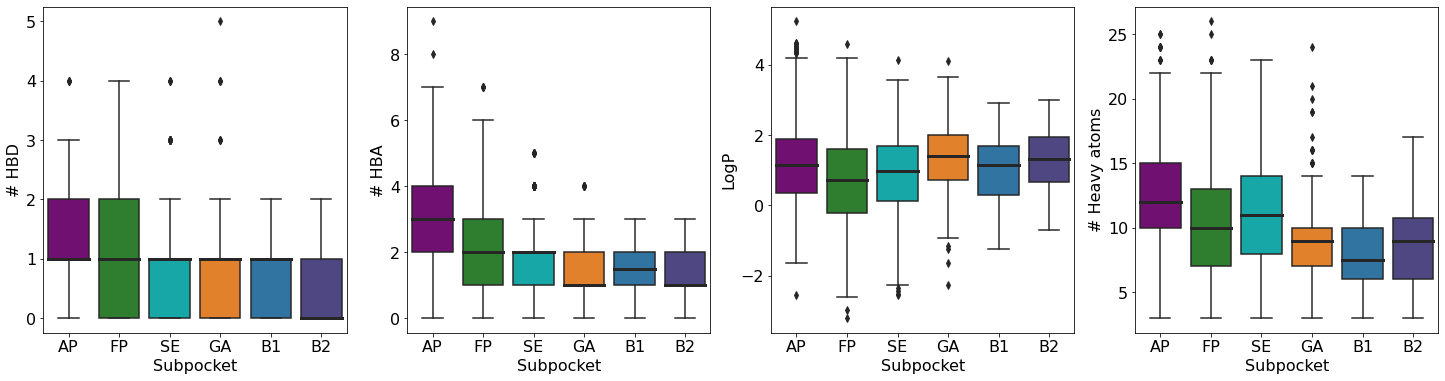

bool_reduced


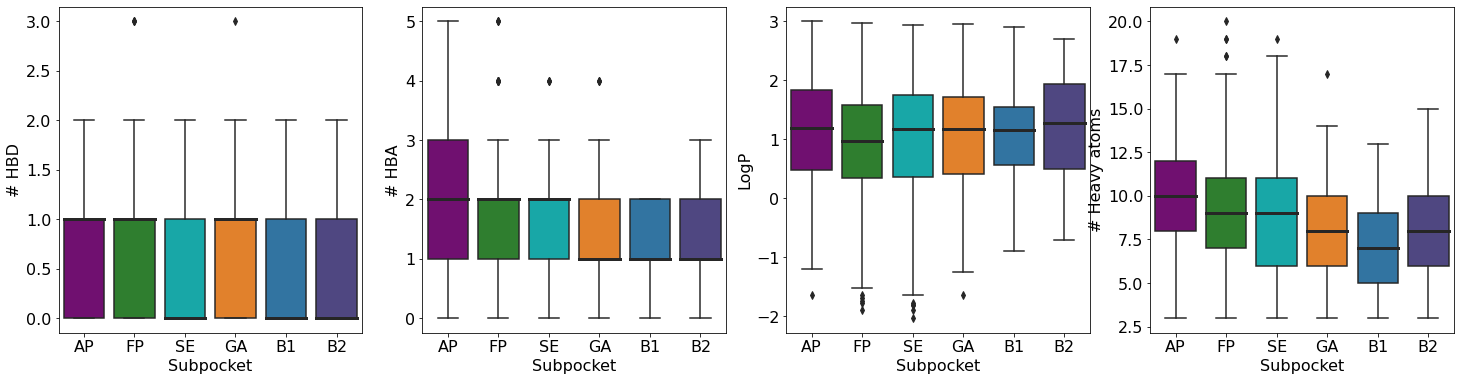

bool_custom


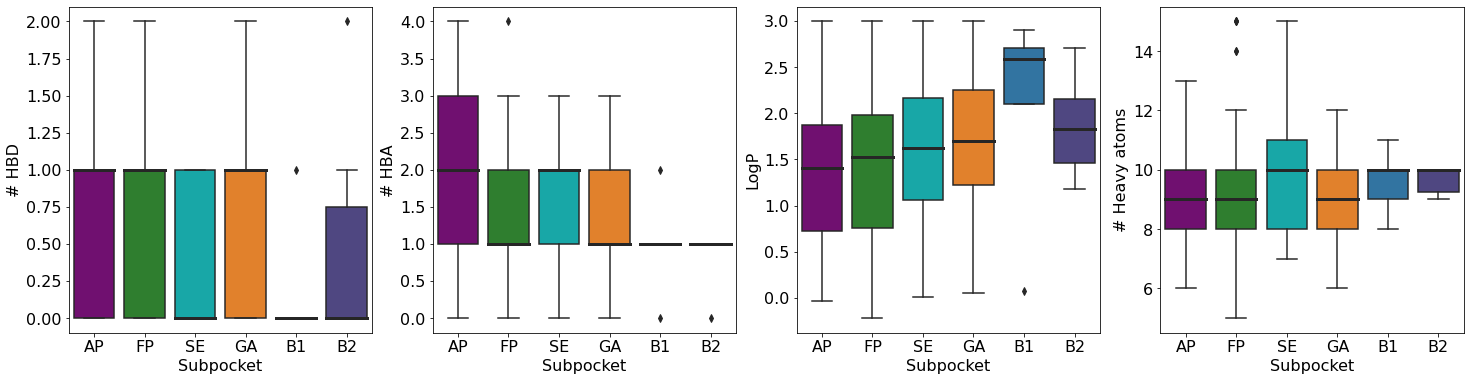

bool_pains


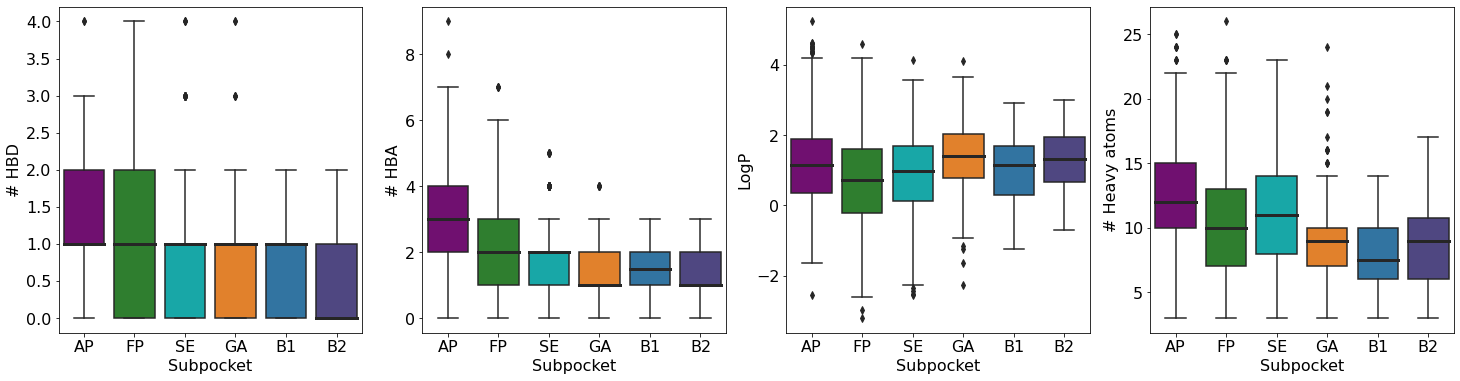

bool_brenk


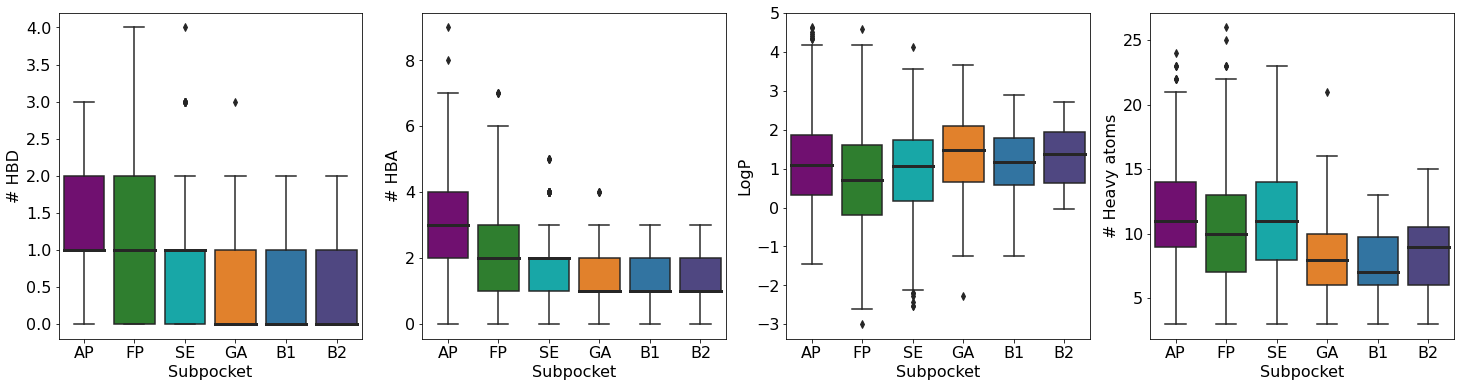

bool_ro3


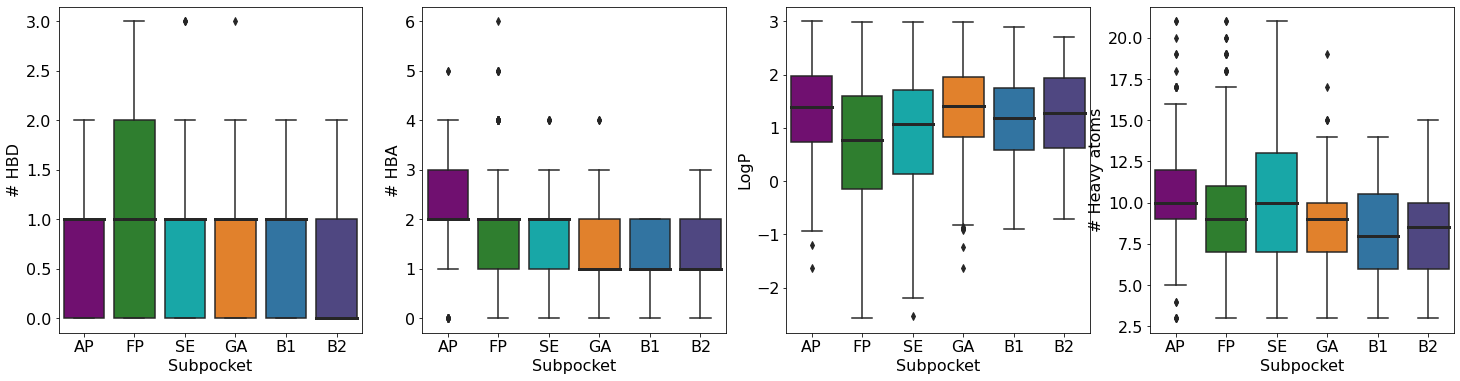

bool_qed


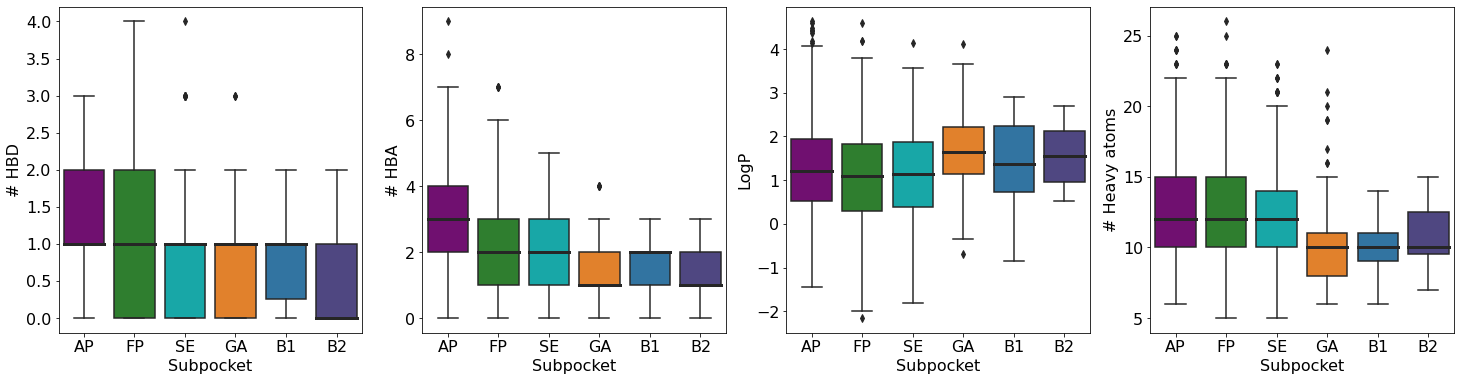

bool_bb


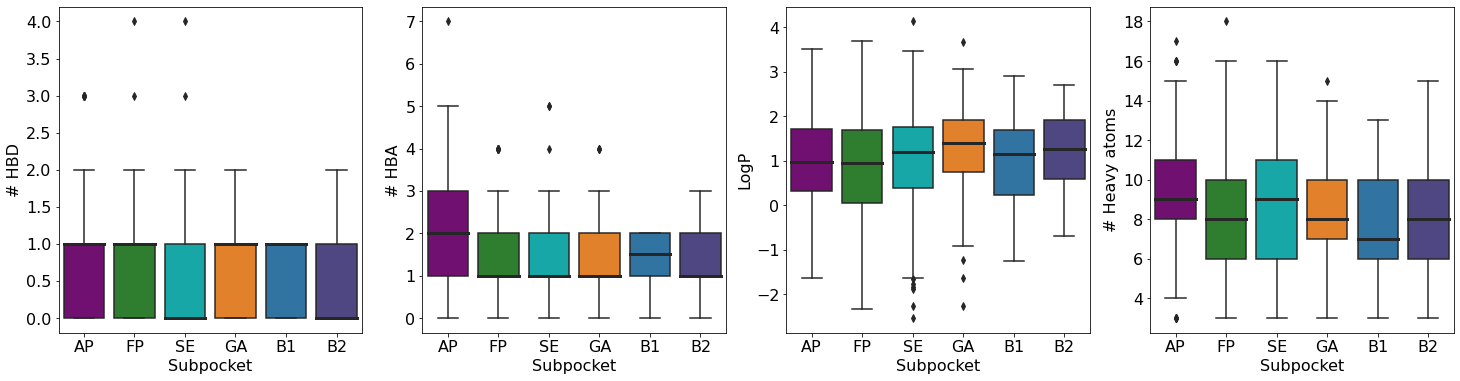

bool_syba


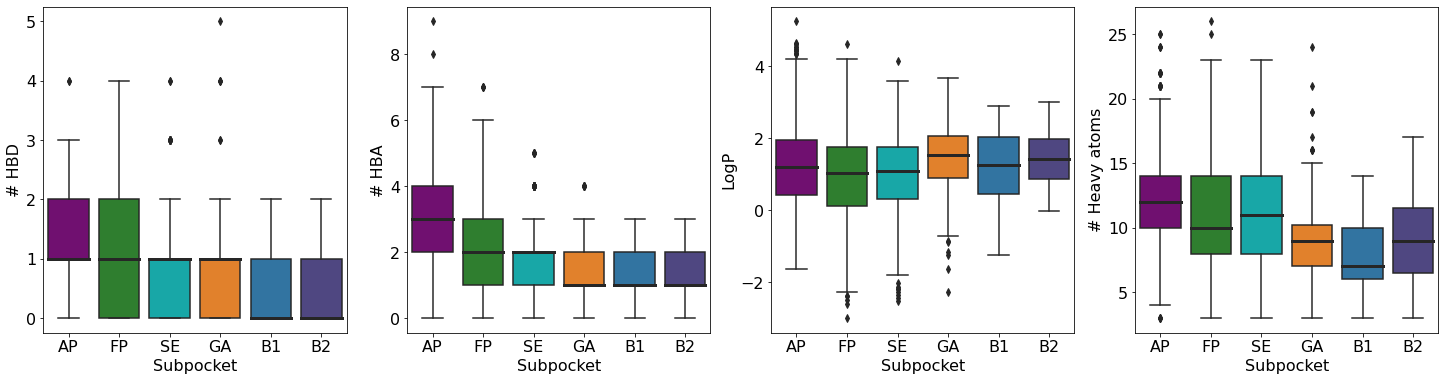

bool_retro


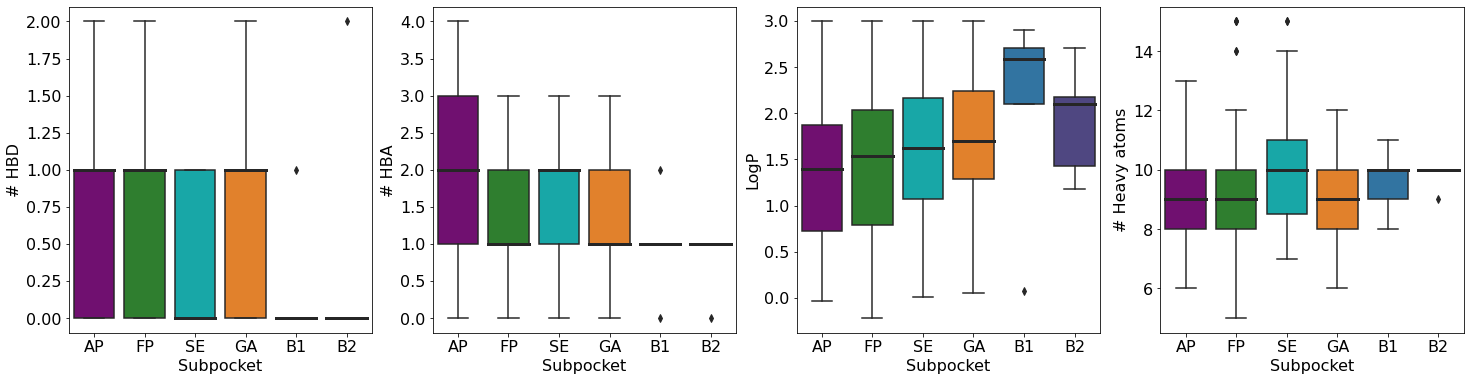

In [165]:
descr = get_descriptors_filters(fragment_library_filter_res, bool_keys)

In [163]:
descr.keys()

dict_keys(['pre-filtered', 'bool_reduced', 'bool_custom', 'bool_pains', 'bool_brenk', 'bool_ro3', 'bool_qed', 'bool_bb', 'bool_syba', 'bool_retro'])

## 7. Development of number of fragments per subpocket during custom filtering

Inspect the number of fragments filtered out by each custom filtering step

In [292]:
#barplot
#count number of fragments after each filtering step
def num_frags_development(filter_res):
    frag_keys= filter_res.keys()
    frag_keys.to_list()
    bool_keys = [x for x in frag_keys if "bool" in x]
    update_results = pd.DataFrame()
    update_results["pre-filtered"] = filter_res.reset_index().groupby("subpocket", sort=False).size()
    for bool_key in bool_keys:
        filter_res = filter_res.loc[filter_res[bool_key] == 1]
        # filter_res = filter_res[filter_res[bool_key].notnull()]
        update_results[bool_key] = filter_res.reset_index().groupby("subpocket", sort=False).size()
    
    
    
    ax = update_results.plot.bar()
    fig = ax.get_figure()

    fig.set_figheight(5)
    fig.set_figwidth(13)

    ax.set_xlabel("Subpocket")
    ax.set_ylabel("Number of fragments")
    ax.set_title("Development of the number of fragments per subpocket after each filter step")
    
    fig.show()
    
    return update_results

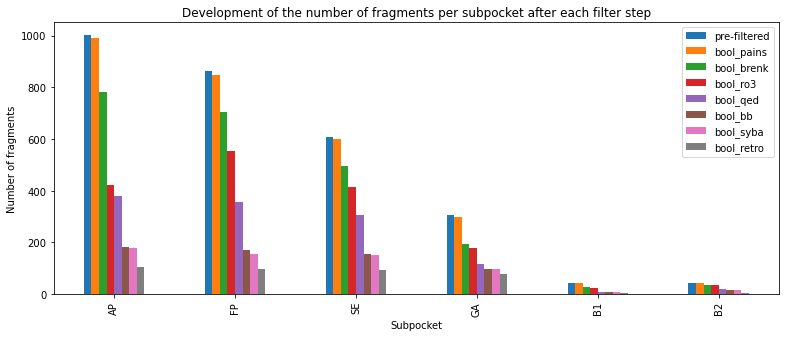

In [293]:
update_results = num_frags_development(filter_results)

In [294]:
update_results

,pre-filtered,bool_pains,bool_brenk,bool_ro3,bool_qed,bool_bb,bool_syba,bool_retro
AP,1001,990,781,422,379,181,179,107
FP,864,847,704,552,357,172,156,97
SE,607,599,495,414,308,154,150,95
GA,306,300,195,179,116,98,96,79
B1,42,42,26,23,10,8,8,5
B2,42,42,36,35,19,18,18,5
